# Various Queries Data From Table
Kita telah mempelajari data source dan membuat query sederhana. Selanjutnya kita akan mempelajari query lebih dalam lagi. Apa saja function yang digunakan dalam query.

In [ ]:
# Pertama kita perlu untuk setup drive di google colab agar kita dapat mengakses file yang sudah kita simpan dalam
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [1]:
#import packages
import os
import sqlite3
import pandas as pd

In [2]:
# Kemudian kita definisikan path folder dimana file database kita disimpan
path = "gdrive/MyDrive/NarasioCDA3/Meet8/" #silahkan masukkan path sesuai dengan letak data di folder drive masing-masing

In [4]:
# untuk mengecek ada file apa saja didalam path yang digunakan
os.listdir(path)

FileNotFoundError: ignored

In [ ]:
# Kemudian kembali membuat connection ke database yang udah ada
conn = sqlite3.connect(path + 'rexon_metals.db')

# Membuat cursor object untuk memanggil SQL statement
cur = conn.cursor()

In [ ]:
# Kemudian kita dapat execute SQL statement. Kali ini kita akan mengecek terdapat tabel apa saja di rexon_metals.db
cur.execute("""
              SELECT 
                  name 
              FROM sqlite_master 
              WHERE type='table'
            """)

print(cur.fetchall())

[('PRODUCT',), ('sqlite_sequence',), ('CUSTOMER',), ('CUSTOMER_ORDER',), ('stocks',)]


In [ ]:
# mendapatkan data product
pd.read_sql_query("""
                    SELECT 
                        *
                    FROM PRODUCT
                  """, conn)

,PRODUCT_ID,DESCRIPTION,PRICE
0,1,Copper,7.51
1,2,Aluminum,2.58
2,3,Silver,15.00
3,4,Steel,12.31
4,5,Bronze,4.00
5,6,Duralumin,7.60
6,7,Solder,14.16
7,8,Stellite,13.31
8,9,Brass,4.75


In [ ]:
# mendapatkan data customer
pd.read_sql_query("""
                    SELECT 
                        *
                    FROM CUSTOMER
                  """, conn)

,CUSTOMER_ID,NAME,REGION,STREET_ADDRESS,CITY,STATE,ZIP
0,1,LITE Industrial,Southwest,729 Ravine Way,Irving,TX,75014
1,2,Rex Tooling Inc,Southwest,6129 Collie Blvd,Dallas,TX,75201
2,3,Re-Barre Construction,Southwest,9043 Windy Dr,Irving,TX,75032
3,4,Prairie Construction,Southwest,264 Long Rd,Moore,OK,62104
4,5,Marsh Lane Metal Works,Southeast,9143 Marsh Ln,Avondale,LA,79782


In [ ]:
# mendapatkan data transaksi
pd.read_sql_query("""
                    SELECT 
                        *
                    FROM CUSTOMER_ORDER
                  """, conn)

,ORDER_ID,ORDER_DATE,SHIP_DATE,CUSTOMER_ID,PRODUCT_ID,ORDER_QTY,SHIPPED
0,1,2015-05-15,2015-05-18,1,1,450,false
1,2,2015-05-18,2015-05-21,3,2,600,false
2,3,2015-05-20,2015-05-23,3,5,300,false
3,4,2015-05-18,2015-05-22,5,4,375,false
4,5,2015-05-17,2015-05-20,3,2,500,false


#### BETWEEN AND
Perintah BETWEEN AND ini biasanya digunakan bersamaan dengan WHERE dengan tujuan mem-filter data berdasarkan variabel yang berada dalam nilai range tertentu.

In [ ]:
# mendapatkan data transaksi selama 4 hari dari tanggal 15 mei 2015 sampai 18 mei 2015
pd.read_sql_query("""
                    SELECT 
                        *
                    FROM CUSTOMER_ORDER
                    WHERE ORDER_DATE BETWEEN '2015-05-15' AND '2015-05-18'
                  """, conn)

,ORDER_ID,ORDER_DATE,SHIP_DATE,CUSTOMER_ID,PRODUCT_ID,ORDER_QTY,SHIPPED
0,1,2015-05-15,2015-05-18,1,1,450,false
1,2,2015-05-18,2015-05-21,3,2,600,false
2,4,2015-05-18,2015-05-22,5,4,375,false
3,5,2015-05-17,2015-05-20,3,2,500,false


In [ ]:
# mendapatkan total kuantiti harian yang terjual selama 4 hari dari tanggal 15 mei 2015 sampai 18 mei 2015
pd.read_sql_query("""
                    SELECT 
                        ORDER_DATE,
                        SUM(ORDER_QTY) AS TOTAL_QTY
                    FROM CUSTOMER_ORDER
                    WHERE ORDER_DATE BETWEEN '2015-05-15' AND '2015-05-18'
                    GROUP BY 1
                  """, conn)

,ORDER_DATE,TOTAL_QTY
0,2015-05-15,450
1,2015-05-17,500
2,2015-05-18,975


#### LIKE
Perintah LIKE digunakan bersamaan dengan WHERE yaitu untuk mem-filter data sesuai dengan syarat/kondisi yang berupa kata kunci (keyword) dan kita tidak mengetahui kata kunci nya secara utuh. Perintah LIKE tidak berdiri sendiri tetapi diikuti dengan wildcard % (percent sign).

In [ ]:
# mendapatkan data customer dengan 2 huruf depan adalah 'Re'
pd.read_sql_query("""
                    SELECT 
                        *
                    FROM CUSTOMER
                    WHERE NAME LIKE 'Re%'
                  """, conn)

,CUSTOMER_ID,NAME,REGION,STREET_ADDRESS,CITY,STATE,ZIP
0,2,Rex Tooling Inc,Southwest,6129 Collie Blvd,Dallas,TX,75201
1,3,Re-Barre Construction,Southwest,9043 Windy Dr,Irving,TX,75032


In [ ]:
# mendapatkan data customer dengan nama belakang adalah 'Construction'
pd.read_sql_query("""
                    SELECT 
                        *
                    FROM CUSTOMER
                    WHERE NAME LIKE '%Construction'
                  """, conn)

,CUSTOMER_ID,NAME,REGION,STREET_ADDRESS,CITY,STATE,ZIP
0,3,Re-Barre Construction,Southwest,9043 Windy Dr,Irving,TX,75032
1,4,Prairie Construction,Southwest,264 Long Rd,Moore,OK,62104


#### EXCEPT
Sama seperti arti katanya yaitu 'KECUALI', EXCEPT digunakan untuk mengambil data yang ada di suatu tabel tetapi tidak ada di tabel lainnya.

In [ ]:
# mendapatkan data id customer yang belum pernah melakukan transaksi
pd.read_sql_query("""
                    SELECT 
                        CUSTOMER_ID
                    FROM CUSTOMER
                    EXCEPT
                    SELECT
                        CUSTOMER_ID
                    FROM CUSTOMER_ORDER
                  """, conn)

,CUSTOMER_ID
0,2
1,4


#### CASE statement
CASE WHEN ini digunakan apabila kita memiliki beberapa kondisi yang akan menghasilkan kondisi tertentu (seperti JIKA MAKA statement). Jadi jika kondisinya benar maka akan menghasilkan value yang udah kita setup, tapi ketika kondisinya salah maka akan menghasilkan value pada ELSE clause.

In [ ]:
# membuat definisi produk pada tiap ID pada produk
pd.read_sql_query("""
                    SELECT 
                        PRODUCT_ID,
                        CASE WHEN PRODUCT_ID = 1 THEN "PRODUK 1"
                        WHEN PRODUCT_ID = 2 THEN "PRODUK 2"
                        WHEN PRODUCT_ID = 3 THEN "PRODUK 3"
                        WHEN PRODUCT_ID = 4 THEN "PRODUK 4"
                        WHEN PRODUCT_ID = 5 THEN "PRODUK 5"
                        END AS Product_name
                    FROM CUSTOMER_ORDER
                    GROUP BY PRODUCT_ID
                  """, conn)

,PRODUCT_ID,Product_name
0,1,PRODUK 1
1,2,PRODUK 2
2,4,PRODUK 4
3,5,PRODUK 5


# Menganalisa beberapa tabel dengan menggunakan Joins
Kita dapat menggunakan join untuk menggabungkan beberapa table menjadi satu. Contohnya dalam menganalisa produk bisnis yang sedang berjalan. Kita akan membutuhkan table list of product yang telah memiliki product ID sebagai primary key dan tabel transaksi yang juga memiliki product ID didalamnya. Untuk menggabungkan kedua tabel tersebut dengan menggunakan product ID sebagai primary key. 

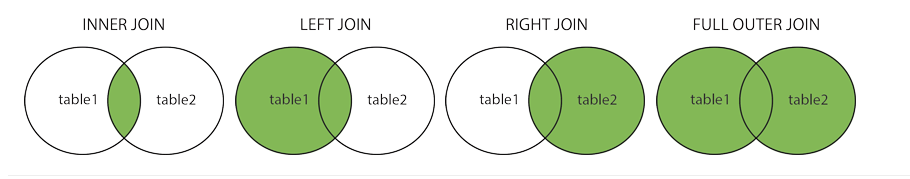

### INNER JOIN 
Inner join akan menghasilkan semua value yang muncul pada kedua tabel

In [ ]:
# mendapatkan data nama customer dan total kuantiti order per customer
pd.read_sql_query("""
                  SELECT
                      CUSTOMER.CUSTOMER_ID, 
                      CUSTOMER.NAME, 
                      SUM(CUSTOMER_ORDER.ORDER_QTY) AS TOTAL_QTY
                  FROM CUSTOMER
                  INNER JOIN CUSTOMER_ORDER ON CUSTOMER.CUSTOMER_ID = CUSTOMER_ORDER.CUSTOMER_ID
                  GROUP BY 1,2
                  """, conn)

,CUSTOMER_ID,NAME,TOTAL_QTY
0,1,LITE Industrial,450
1,3,Re-Barre Construction,1400
2,5,Marsh Lane Metal Works,375


### LEFT JOIN 
LEFT JOIN akan menghasilkan semua value pada tabel sebelah kiri (yang pertama distatement dan value pada tabel sebelah kanan yang sesuai dengan tabel kiri

In [ ]:
# mendapatkan data total order dari seluruh custoomer
pd.read_sql_query("""

                  SELECT 
                      CUSTOMER.CUSTOMER_ID, 
                      CUSTOMER.NAME, 
                      SUM(CUSTOMER_ORDER.ORDER_QTY) AS TOTAL_QTY
                  FROM CUSTOMER
                  LEFT JOIN CUSTOMER_ORDER ON CUSTOMER.CUSTOMER_ID = CUSTOMER_ORDER.CUSTOMER_ID
                  GROUP BY 1,2
                  """, conn)

,CUSTOMER_ID,NAME,TOTAL_QTY
0,1,LITE Industrial,450.0
1,2,Rex Tooling Inc,NaN
2,3,Re-Barre Construction,1400.0
3,4,Prairie Construction,NaN
4,5,Marsh Lane Metal Works,375.0


### Multi Condition Joins
Digunakan untuk mengabungkan lebih dari dua tabel.

In [ ]:
# mendapatkan data deskripsi produk yang di order setiap customer beserta wilayah kota order nya
pd.read_sql_query("""
                  SELECT 
                      CUSTOMER_ORDER.CUSTOMER_ID, 
                      CUSTOMER.CITY,
                       PRODUCT.DESCRIPTION
                  FROM CUSTOMER_ORDER
                  LEFT JOIN PRODUCT ON CUSTOMER_ORDER.PRODUCT_ID = PRODUCT.PRODUCT_ID
                  INNER JOIN CUSTOMER ON CUSTOMER_ORDER.CUSTOMER_ID = CUSTOMER.CUSTOMER_ID
                  """, conn)

,CUSTOMER_ID,CITY,DESCRIPTION
0,1,Irving,Copper
1,3,Irving,Aluminum
2,3,Irving,Bronze
3,5,Avondale,Steel
4,3,Irving,Aluminum


### UNION dan UNION ALL
UNION digunakan untuk menggabungkan dua tabel secara vertikal. Terdapat dua UNION operator, yaitu UNION dan UNION ALL. UNION digunakan untuk memunculkan semua list yang berbeda, sehingga duplicate value akan dimunculkan sekali.Berbeda dengan UNION, UNION ALL akan menghasilkan semua value yang terdapat pada tabel tersebut tanpa memperhitungkan duplicate.


In [ ]:
pd.read_sql_query("""
                  SELECT CUSTOMER_ID
                  FROM CUSTOMER_ORDER

                  UNION

                  SELECT CITY
                  FROM CUSTOMER

                  """, conn)

,CUSTOMER_ID
0,1
1,3
2,5
3,Avondale
4,Dallas
5,Irving
6,Moore


In [ ]:
pd.read_sql_query("""
                  SELECT CUSTOMER_ID
                  FROM CUSTOMER_ORDER

                  UNION ALL

                  SELECT CITY
                  FROM CUSTOMER

                  """, conn)

,CUSTOMER_ID
0,1
1,3
2,3
3,5
4,3
5,Irving
6,Dallas
7,Irving
8,Moore
9,Avondale


# SUBQUERY

In [ ]:
# menambahkan tanggal pertama kali order pada masing-masing customer di tabel customer
pd.read_sql_query("""
                  SELECT 
                    c.*,
                    fod.FIRST_ORDER_DATE
                  FROM CUSTOMER c
                  LEFT JOIN  
                     (SELECT
                        CUSTOMER_ID, 
                        MIN(ORDER_DATE) AS FIRST_ORDER_DATE
                      FROM CUSTOMER_ORDER
                      GROUP BY 1
                      ) fod
                  ON fod.CUSTOMER_ID = c.CUSTOMER_ID
                  """, conn)

,CUSTOMER_ID,NAME,REGION,STREET_ADDRESS,CITY,STATE,ZIP,FIRST_ORDER_DATE
0,1,LITE Industrial,Southwest,729 Ravine Way,Irving,TX,75014,2015-05-15
1,2,Rex Tooling Inc,Southwest,6129 Collie Blvd,Dallas,TX,75201,None
2,3,Re-Barre Construction,Southwest,9043 Windy Dr,Irving,TX,75032,2015-05-17
3,4,Prairie Construction,Southwest,264 Long Rd,Moore,OK,62104,None
4,5,Marsh Lane Metal Works,Southeast,9143 Marsh Ln,Avondale,LA,79782,2015-05-18


In [ ]:
# mengetahui total hasil penjualan setiap produk
pd.read_sql_query("""
                   SELECT 
                      p.PRODUCT_ID,
                      CASE WHEN p.PRICE*tq.TOTAL_QTY IS NULL THEN 0 ELSE p.PRICE*tq.TOTAL_QTY END AS SALES
                   FROM PRODUCT p
                   LEFT JOIN
                     (SELECT
                        PRODUCT_ID, 
                        SUM(ORDER_QTY) AS TOTAL_QTY
                      FROM CUSTOMER_ORDER
                      GROUP BY 1
                      ) tq
                    ON tq.PRODUCT_ID=p.PRODUCT_ID
                  """, conn)

,PRODUCT_ID,SALES
0,1,3379.50
1,2,2838.00
2,3,0.00
3,4,4616.25
4,5,1200.00
5,6,0.00
6,7,0.00
7,8,0.00
8,9,0.00
